In [ ]:
# Dataset from https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import linear_model, model_selection
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import string
import nltk

##Reading Datasets

In [2]:
fake = pd.read_csv("./Fake.csv")
real = pd.read_csv("./Real.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
real.shape

(21417, 4)

##Preparing and cleaning the data

In [5]:
# Setting a flag to distinguish between real and fake datasets
fake["target"] = "fake"
real["target"] = "real"

In [6]:
# Concatenating the dataframes
data = pd.concat([fake, real]).reset_index(drop=True)
data.shape

# Shuffling the data
from sklearn.utils import shuffle

data = shuffle(data)
data = data.reset_index(drop=True)

data.head()

,title,text,subject,date,target
0,Rights groups condemn Saudi arrests as crackdo...,(Reuters) - The campaign group Human Rights Wa...,worldnews,"September 15, 2017",real
1,Baghdad piles pressure on Iraqi Kurds to rever...,"BAGHDAD/ERBIL, Iraq (Reuters) - Baghdad heaped...",worldnews,"September 26, 2017",real
2,Trump Supporter Scott Baio Makes SHOCKINGLY I...,"On Saturday, the internet was shocked to learn...",News,"April 24, 2017",fake
3,Henningsen on CrossTalk Debating ‘Trump & His ...,Has President Trump handed over US foreign pol...,US_News,"September 15, 2017",fake
4,‘Journalistic Malpractice’: CNN Slammed for ‘B...,21st Century Wire says This definitely needed ...,US_News,"June 8, 2016",fake


In [7]:
# Removing the date column from the data
data.drop(["date"], axis=1, inplace=True)
data.head()

,title,text,subject,target
0,Rights groups condemn Saudi arrests as crackdo...,(Reuters) - The campaign group Human Rights Wa...,worldnews,real
1,Baghdad piles pressure on Iraqi Kurds to rever...,"BAGHDAD/ERBIL, Iraq (Reuters) - Baghdad heaped...",worldnews,real
2,Trump Supporter Scott Baio Makes SHOCKINGLY I...,"On Saturday, the internet was shocked to learn...",News,fake
3,Henningsen on CrossTalk Debating ‘Trump & His ...,Has President Trump handed over US foreign pol...,US_News,fake
4,‘Journalistic Malpractice’: CNN Slammed for ‘B...,21st Century Wire says This definitely needed ...,US_News,fake


In [8]:
# Removing the title column
data.drop(["title"], axis=1, inplace=True)
data.head()

,text,subject,target
0,(Reuters) - The campaign group Human Rights Wa...,worldnews,real
1,"BAGHDAD/ERBIL, Iraq (Reuters) - Baghdad heaped...",worldnews,real
2,"On Saturday, the internet was shocked to learn...",News,fake
3,Has President Trump handed over US foreign pol...,US_News,fake
4,21st Century Wire says This definitely needed ...,US_News,fake


In [9]:
# Converting the text column to lowercase
data["text"] = data["text"].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,(reuters) - the campaign group human rights wa...,worldnews,real
1,"baghdad/erbil, iraq (reuters) - baghdad heaped...",worldnews,real
2,"on saturday, the internet was shocked to learn...",News,fake
3,has president trump handed over us foreign pol...,US_News,fake
4,21st century wire says this definitely needed ...,US_News,fake


In [10]:
# Removing punctuation from text
def punctuation_remove(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = "".join(all_list)
    return clean_str


data["text"] = data["text"].apply(punctuation_remove)
data.head()

,text,subject,target
0,reuters the campaign group human rights watch...,worldnews,real
1,baghdaderbil iraq reuters baghdad heaped pres...,worldnews,real
2,on saturday the internet was shocked to learn ...,News,fake
3,has president trump handed over us foreign pol...,US_News,fake
4,21st century wire says this definitely needed ...,US_News,fake


In [11]:
# Removing stopwords from text
nltk.download("stopwords", download_dir="$pwd")
nltk.data.path.append("$pwd")

from nltk.corpus import stopwords

stop = stopwords.words("english")

data["text"] = data["text"].apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
data.head()

[nltk_data] Downloading package stopwords to $pwd...
[nltk_data]   Package stopwords is already up-to-date!


,text,subject,target
0,reuters campaign group human rights watch frid...,worldnews,real
1,baghdaderbil iraq reuters baghdad heaped press...,worldnews,real
2,saturday internet shocked learn apparent sudde...,News,fake
3,president trump handed us foreign policy elite...,US_News,fake
4,21st century wire says definitely needed saidh...,US_News,fake


##Exploring the data

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


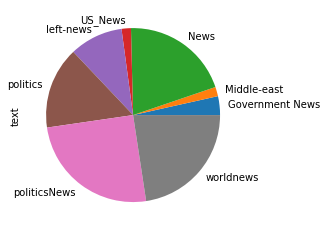

In [12]:
# Number of articles per subject
print(data.groupby(["subject"])["text"].count())
data.groupby(["subject"])["text"].count().plot(kind="pie")
plt.show()

target
fake    23481
real    21417
Name: text, dtype: int64


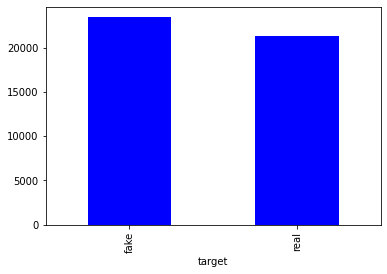

In [13]:
# Number of fake and real articles
print(data.groupby(["target"])["text"].count())
data.groupby(["target"])["text"].count().plot(kind="bar", color="blue")
plt.show()

In [23]:
# Counting the most frequently occuring words in text
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()


def counter(text, column_text, quantity):
    all_words = " ".join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns="Frequency", n=quantity)
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df_frequency, x="Word", y="Frequency", color="red")
    ax.set(ylabel="Count")
    plt.xticks(rotation="vertical")
    plt.show()

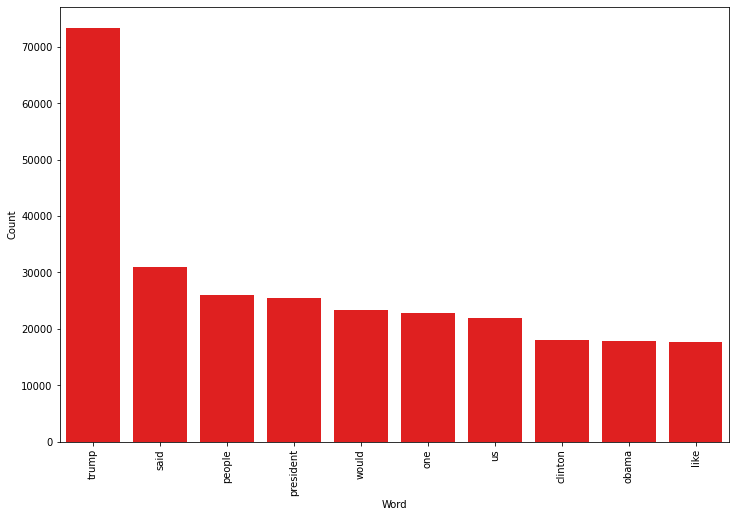

In [24]:
# The top 15 most frequently occuring words in FAKE news
counter(data[data["target"] == "fake"], "text", 10)

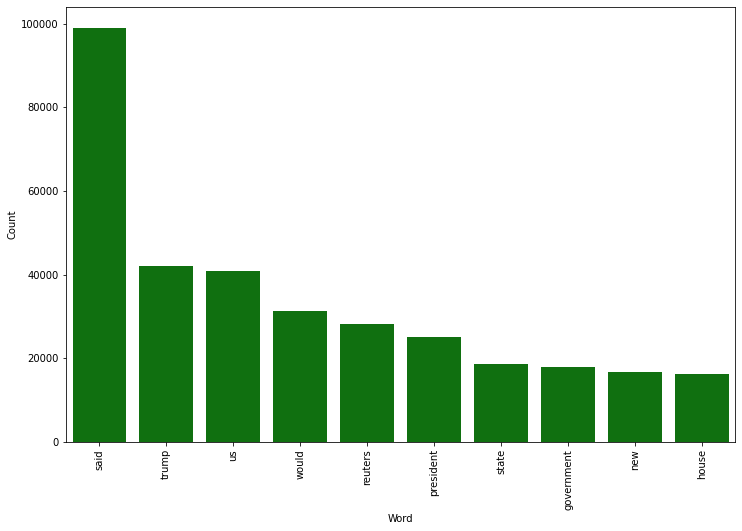

In [16]:
# The top 15 most frequently occuring words in REAL news
counter(data[data["target"] == "real"], "text", 10)

##Logistic Regression

In [30]:
# Vectorizing and applying TF-IDF
X_train, X_test, y_train, y_test = train_test_split(data["text"], data.target, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("model", LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Model Accuracy
prediction_lr = model.predict(X_test)
print("Model Accuracy: {}%".format(round(accuracy_score(y_test, prediction_lr) * 100, 2)))

Model Accuracy: 98.78%


In [31]:
# Function to plot confusion matrix
from sklearn import metrics
import itertools


def plot_confusion_matrix(c_matrix, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):

    plt.imshow(c_matrix, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        c_matrix = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    threshold_v = c_matrix.max() / 2.0
    for i, j in itertools.product(range(c_matrix.shape[0]), range(c_matrix.shape[1])):
        plt.text(
            j,
            i,
            c_matrix[i, j],
            horizontalalignment="center",
            color="white" if c_matrix[i, j] > threshold_v else "black",
        )

    plt.tight_layout()
    plt.ylabel("Ground truth")
    plt.xlabel("Prediction")

Confusion matrix, without normalization


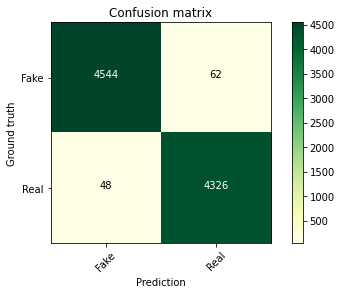

In [32]:
# Plotting the confusion matrix
c_matrix = metrics.confusion_matrix(y_test, prediction_lr)
plot_confusion_matrix(c_matrix, classes=["Fake", "Real"], cmap="YlGn")

##Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("model", DecisionTreeClassifier(criterion="entropy", max_depth=20, splitter="best", random_state=42)),
    ]
)
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction_dtc = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction_dtc) * 100, 2)))

accuracy: 99.62%


Confusion matrix, without normalization


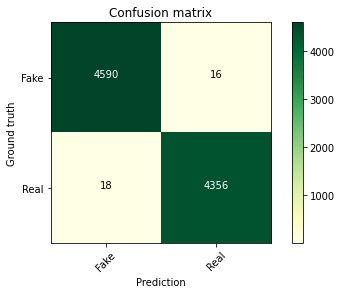

In [34]:
c_matrix = metrics.confusion_matrix(y_test, prediction_dtc)
plot_confusion_matrix(c_matrix, classes=["Fake", "Real"], cmap="YlGn")

##Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("model", RandomForestClassifier(n_estimators=50, criterion="entropy")),
    ]
)

model = pipe.fit(X_train, y_train)
prediction_rfc = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction_rfc) * 100, 2)))

accuracy: 99.02%


Confusion matrix, without normalization


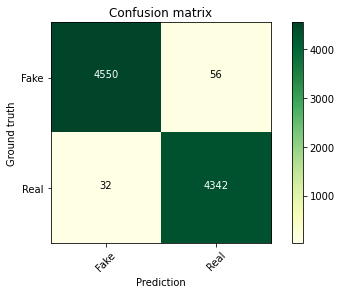

In [36]:
c_matrix = metrics.confusion_matrix(y_test, prediction_rfc)
plot_confusion_matrix(c_matrix, classes=["Fake", "Real"], cmap="YlGn")

In [29]:
da = [
    """WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the “Dreamers,” people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. “We need to do DACA clean,” she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. """
]
prediction_lr = model.predict(da)
print(prediction)

['real']


In [37]:
da = [
    """WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the “Dreamers,” people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. “We need to do DACA clean,” she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. """
]
prediction_dtc = model.predict(da)
print(prediction)

['real']


In [38]:
da = [
    """WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the “Dreamers,” people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. “We need to do DACA clean,” she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. """
]
prediction_rfc = model.predict(da)
print(prediction)

['real']


In [ ]:
# To generate pickle file
import pickle

# Dump the trained Naive Bayes classifier with Pickle
Pkl_filename = "C:/Users/HP/Desktop/fake_news/Model.pkl"
# Open the file to save as pkl file
Model_pkl = open(Pkl_filename, "wb")
pickle.dump(model, Model_pkl)
# Close the pickle instances
Model_pkl.close()